In [21]:
from qiskit import (QuantumRegister, ClassicalRegister, QuantumCircuit, execute, IBMQ)
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import random_statevector
from qiskit.extensions import Initialize
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

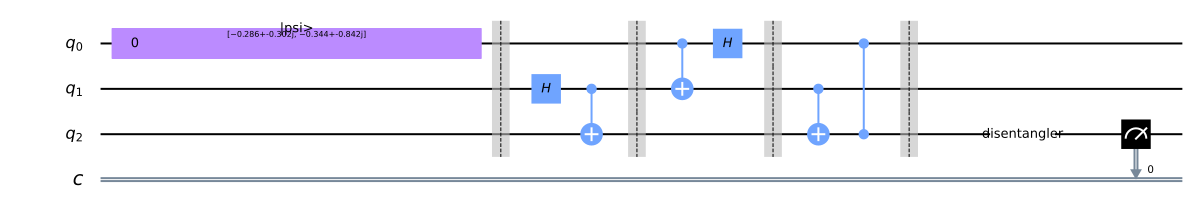

In [34]:
qr = QuantumRegister(3)
circ = QuantumCircuit(3,1)
init = Initialize(random_statevector(2).data)
circ.append(init,[0])
circ.barrier()
circ.h(1)
circ.cx(1, 2)
circ.barrier()
circ.cx(0, 1)
circ.h(0)
circ.barrier()
circ.cx(1,2)
circ.cz(0,2)
circ.barrier()
circ.append(init.gates_to_uncompute(),[2])
circ.measure(2, 0)
circ.draw(output='mpl')

least busy backend:  ibmq_vigo
Job Status: job has successfully run


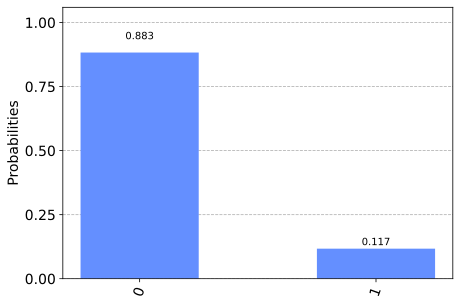

In [43]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator and x.configuration().n_qubits >= 3 and x.status().operational==True))
print("least busy backend: ", backend)
job = execute(circ, backend=backend, shots=1024)
job_monitor(job)
plot_histogram(job.result().get_counts(circ))